**19/12/2021**
<br>
Bruno Mazzilli González

> # Seleccionamos el mejor modelo

En este notebook vamos a comparar las diferentes matrices de confusión y las curvas ROC de todos los modelos que se han elaborado para este estudio. Se tendrán en cuenta todas estas medidas y valores para tomar la decisión de que modelo elegir. Se considerará también el modelo de negocio de una compañía de seguros.

### Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
import pickle
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import datasets, metrics, model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
#import scikitplot as skplt
import warnings
warnings.filterwarnings("ignore")

### Importamos datos

In [2]:
X_train = pd.read_parquet('data/x_train.parquet')

X_test = pd.read_parquet('data/x_test.parquet')
X_test.reset_index(drop=True, inplace=True)

Y_train = pd.read_parquet('data/y_train.parquet')

Y_test = pd.read_parquet('data/y_test.parquet')
Y_test.reset_index(drop=True, inplace=True)

### Importamos modelos

In [4]:
base =  pd.read_pickle('models/base_model.pkl')

logit =  pd.read_pickle('models/logit_model.pkl')

random_forest =  pd.read_pickle('models/random_forest_model.pkl')

xg_boost = pd.read_pickle('models/xg_boost_model.pkl')

### Matriz de confusión

In [5]:
def conf_matrix_norm(Y_test, Y_pred): # va a comparar los resultados de las predicciones de la variable target vs la real del testset
    cnf_matrix_tra = confusion_matrix(Y_test, Y_pred,  normalize='true')
    conf_plot = sns.heatmap(cnf_matrix_tra, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix, with normalization")
    conf_plot.set_ylabel('True Label')
    conf_plot.set_xlabel('Predicted Label');

#### Modelo Base

              precision    recall  f1-score   support

           0       0.98      1.00      0.99   1474318
           1       0.00      0.00      0.00     24548

    accuracy                           0.98   1498866
   macro avg       0.49      0.50      0.50   1498866
weighted avg       0.97      0.98      0.98   1498866

CPU times: user 3.19 s, sys: 274 ms, total: 3.46 s
Wall time: 3.56 s


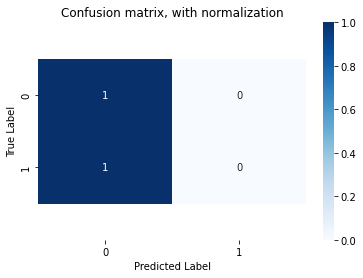

In [8]:
%%time
pred_base = base.predict(X_test)
conf_matrix_norm(Y_test, pred_base)
print(classification_report(Y_test,pred_base))

#### Modelo Regresión Logística

              precision    recall  f1-score   support

           0       0.99      0.74      0.85   1474318
           1       0.04      0.70      0.08     24548

    accuracy                           0.74   1498866
   macro avg       0.52      0.72      0.46   1498866
weighted avg       0.98      0.74      0.84   1498866

CPU times: user 4.77 s, sys: 1.77 s, total: 6.54 s
Wall time: 7.66 s


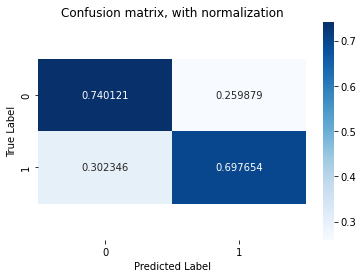

In [9]:
%%time
pred_logit = logit.predict(X_test)
conf_matrix_norm(Y_test, pred_logit)
print(classification_report(Y_test,pred_logit))

#### Modelo Random Forest

              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1474318
           1       0.39      0.25      0.30     24548

    accuracy                           0.98   1498866
   macro avg       0.69      0.62      0.65   1498866
weighted avg       0.98      0.98      0.98   1498866

CPU times: user 1min 19s, sys: 10.8 s, total: 1min 30s
Wall time: 47.1 s


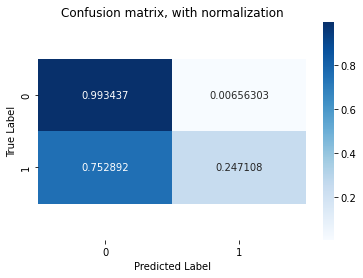

In [10]:
%%time
pred_rf= random_forest.predict(X_test)
conf_matrix_norm(Y_test, pred_rf)
print(classification_report(Y_test,pred_rf))

#### Modelo XG BOOST:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99   1474318
           1       0.60      0.15      0.24     24548

    accuracy                           0.98   1498866
   macro avg       0.79      0.57      0.61   1498866
weighted avg       0.98      0.98      0.98   1498866

CPU times: user 45.8 s, sys: 3.62 s, total: 49.5 s
Wall time: 26.6 s


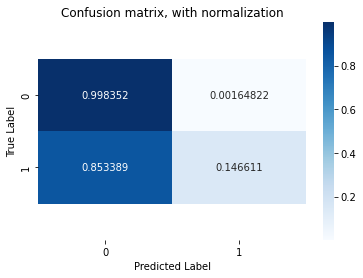

In [11]:
%%time
pred_boost= xg_boost.predict(X_test)
conf_matrix_norm(Y_test, pred_boost)
print(classification_report(Y_test,pred_boost))

### Curva ROC:

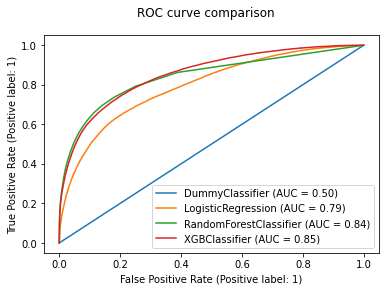

In [14]:
base_disp = metrics.plot_roc_curve(base, X_test, Y_test) # ROC null_model
logit_disp = metrics.plot_roc_curve(logit, X_test, Y_test ,ax=base_disp.ax_) # ROC logit_model mismos ejes que el roc null_model
rf_disp = metrics.plot_roc_curve(random_forest, X_test, Y_test, ax=base_disp.ax_) # ROC random_forest sames axes roc null_model
boost_disp = metrics.plot_roc_curve(xg_boost, X_test, Y_test, ax=base_disp.ax_) # ROC XG_BOOST mismos ejes que el roc null_model
base_disp.figure_.suptitle("ROC curve comparison") # título
plt.show()

## Mejor Modelo

En primer lugar, hemos considerado el porcentaje de accuracy de los modelos. Los modelos Random Forest y XG BOOST tienen una clara ventaja en esta métrica. Esto se debe a que estos dos modelos han logrado predecir la clase 0 (no ha habido victimas mortales en el accidente) de la variable target mucho mejor y como ya hemos mencionado el dataset esta desbalanceado a favor de la clase 0. Por tanto, al predecir la clase 0 mejor estos dos modelos han conseguido obtener un mejor accuracy. <br> <br>
No obstante nos interesa predecir con mayor éxito la clase 1 (ha habido una victima mortal) de la variable target. En este sentido tomamos el punto de vista de una compañía de seguros. El coste de errores para una compañía de seguros es mayor cuando se predice la clase 1 cuando en verdad era la clase 0 (es decir falsos positivos). Esto se debe a que un mayor numero de falsos positivos implica mayor inmovilización de capital para pagar estas casuísticas. Este capital se podría desplegar a areas más fructíferas de la empresa si se reduce el numero de falsos positivos. Por otro lado, predecir la clase 0 cuando en realidad era la clase 1 (falso negativo) implica que la compañía de seguros no estaría desplegando capital suficiente para pagar estas casuísticas. Nos interesa encontrar un modelo que reduzca en medida de lo posible el numero de falsos positivos y falsos negativos. 
Se considera que el coste de error para la aseguradora es mayor cuando el numero de falsos negativos es mayor ya que no tener capital suficiente para pagar las casuísticas puede resultar en el incumplimiento de algunos contratos de seguros. Por tanto queremos seleccionar el modelo que tenga el menor numero de falsos negativos y falsos positivos pero a la vez con preferencia a reducir el numero de falsos negativos.
<br><br>
Si observamos las matrices de confusión de nuestros modelos vemos que el modelo de regresión logística es el que ha conseguido predecir la clase 1 con mayor éxito. Sin embargo observamos que es muy elevada la cifra de accidentes que categoriza como clase 1 que en realidad no lo son (falsos positivos). En cambio este modelo tiene el menor numero de falsos negativos. Siguiendo este criterio la entidad aseguradora obtendría un mejor balance del numero de falsos negativos y falsos positivos. <br><br>
Si a esto le añadimos el factor 'tiempo de procesamiento' para cada modelo, el modelo de regresión logística sería el claro ganador. No obstante fijandonos solamente en las matrices de confusión no estamos considerando las características de un dataset con las clases de la variable target claramente desbalanceadas. Por esto es importante fijarse el f1-score, una métrica que considera el numero de falsos positivos y falsos negativos y que por tanto es más útil a la hora de considerar el coste de los errores. El modelo con el mayor f1-score es el random forest. Este modelo es el que reduce mas que los demás modelos el numero de falsos positivos y falsos negativos. El segundo modelo con el mejor f1_score es el XG BOOST. Por tanto vamos a comparar estos dos modelos para elegir el modelo ganador. <br><br>
Para decidir entre estos modelos vamos a considerar la métrica de recall. Esta métrica se calcula dividiendo el numero de positivos correctos por el total positivos correctos y falsos negativos. Por tanto el modelo con mejor valor para esta métrica es el que obtiene el mejor numero de falsos negativos y falsos positivos pero a la vez con preferencia a reducir el numero de falsos negativos. Finalmente nos decantamos por el modelo random forest que tiene mejor recall. La comparación de las curvas de ROC apoyan nuestra decisión. El modelo random forest es el que consigue el mayor numero de positivos correctos y a la vez reduce el numero de falsos positivos. A esto le hemos añadido una consideración por el numero de falsos negativos para decidir el mejor modelo. 

A continuación, procedemos a estimar los mejores hiperparámetros para el modelo Random Forest:

Hiperparámetros:

Definimos los mejores hiperparámetros para nuestro mejor modelo. Esto en pricipio, permitirá optimizar el modelo mejorando así su aplicación.

In [ ]:
%%time
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy'],
    'n_estimators': [200, 500]
 }

gsearch_RandomForest = GridSearchCV(estimator = RandomForestClassifier(500), 
                                    param_grid = param_grid, 
                                    scoring = 'f1',
                                    n_jobs = -1,
                                    verbose=2,
                                    cv = 3)



#usamos todos
gsearch_RandomForest.fit(X_train, np.ravel(Y_train))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
gsearch_RandomForest.best_params_

In [ ]:
gsearch_RandomForest.best_estimator_

In [ ]:
%%time
gsearch_RandomForest2 = gsearch_RandomForest.best_estimator_
gsearch_RandomForest2.fit(X_train, Y_train)

In [ ]:
%%time
pred_param = gsearch_RandomForest2.predict(X_test)
conf_matrix_norm(Y_test, pred_param)
print(classification_report(Y_test ,pred_param))

In [ ]:
metrics.plot_roc_curve(gsearch_RandomForest2, X_test, Y_test)                       # CURVA ROC
plt.show() 
print("Random Forest score train: ", gsearch_RandomForest2.score(X_train, Y_train)) # score_train
print("Random Forest score: ", gsearch_RandomForest2.score(X_test, Y_test))         # score_test

In [ ]:
predicted_probabilities = gsearch_RandomForest2.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(Y_test, predicted_probabilities)

In [ ]:
coefs = np.abs(gsearch_RandomForest2.feature_importances_)
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Feature importances (Random Forest Param)")
plt.bar(range(10), coefs[indices[:10]],
       color="r", align="center")
plt.xticks(range(10), X_train.columns[indices[:10]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

#### Guardamos el modelo

In [ ]:
def save_models(filename, model):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [ ]:
save_models('models/rf_param.pkl', gsearch_RandomForest2) 

### Conclusiones

El objetivo principal de este estudio ha sido elaborar modelos de machine learning que predigan lo mejor posible si ha habido o no una víctima mortal en un accidente de tráfico dadas ciertas características. Se ha utilizado un dataset de la página web de Transport Canada y se ha tomado el punto de vista de una entidad aseguradora con el fin de optimizar el modelo de negocio.
<br> <br>
Tras el analisis exploratorio y algunas modificaciones en el dataset hemos ajustado a nuestro dataset varios modelos de machine learning incluyendo: regresión logística, random forest, XG Boost y  k-nn. Este último no se ha podido ajustar debido a la capacidad de computo (Será entrenado mas adelante no obstante). Una consideración importante a la hora de hacer el estudio ha sido el tiempo que ha tardado cada modelo en ajustarse a nuestro training set y hacer la predicción en el test set. El modelo XG Boost ha sido el que mas tiempo ha tardado. El que menos ha tardado ha sido el modelo de regresión logística. No obstante este no ha sido el factor mas importante a la hora de escoger el mejor modelo.
<br> <br>
Después de analizar los indicadores más relevantes de cada modelo, como el recall, el f-1 o el número de falsos negativos, y teniendo en cuenta el conocimiento de negocio, hemos concluido que el modelo óptimo es el modelo random forest hiperparametrizado.
<br><br>
Adicionalmente, mediante la curva de cumulative gains, hemos obtenido que nuestro modelo es capaz de predecir el 80% de los accidentes de clase 1 con aproximadamente el 25% de la muestra y cerca del 100% de los accidentes de clase 1 con el 60% de la muestra.
<br><br>
Respecto a las variables seleccionadas, es destacable que todos los modelos dan distintas importancias a las variables de nuestro dataset. Nuestro mejor modelo, le da mucha importancia a el momento en el que ocurrió el accidente. Habría que hacer un analisis más profundo para averiguar las variables con mayor capacidad predictiva. Por ejemplo, si quitamos cierta variable, se reduce mucho la capacidad predictiva de nuestro modelo?
<br><br>
Para concluir, nos gustaría destacar la importancia y dificultad del proceso de limpieza del dataset y selección de variables, siendo esencial el conocimiento de negocio, tanto para ajustar los modelos correctamente, como para la selección del modelo óptimo.